In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

import pathlib

from google.colab import drive
drive.mount("/content/gdrive")

data_dir = "gdrive/My Drive/vehicle_images"

Mounted at /content/gdrive


In [2]:
batch_size = 32
img_height = 180
img_width = 180

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

class_names = train_dataset.class_names
print(class_names)

Found 4333 files belonging to 4 classes.
Using 3467 files for training.
Found 4333 files belonging to 4 classes.
Using 866 files for validation.
['bus', 'motorcycle', 'plane', 'train']


(32, 180, 180, 3)
(32,)


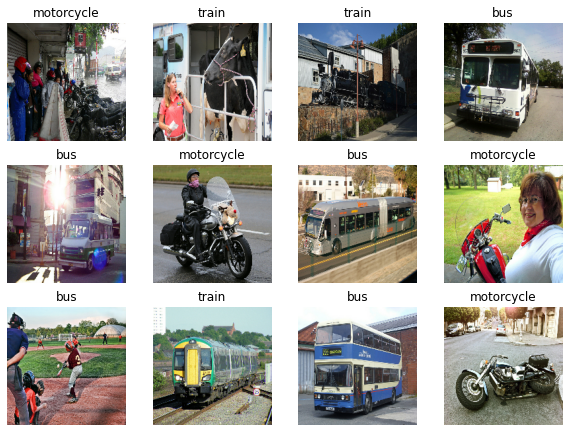

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size = AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

## Notice the pixels values are now in '[0, 1]'
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [5]:
num_classes = 4
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(256, activation = 'relu'),
                    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [6]:
epochs= 10
history = model.fit(
    train_dataset, 
    validation_data = val_dataset, 
    epochs=epochs)

Epoch 1/10
109/109 [==============================] - 278s 2s/step - loss: 1.2061 - accuracy: 0.4560 - val_loss: 1.0414 - val_accuracy: 0.5693
Epoch 2/10
109/109 [==============================] - 3s 26ms/step - loss: 1.0397 - accuracy: 0.5570 - val_loss: 1.0346 - val_accuracy: 0.5716
Epoch 3/10
109/109 [==============================] - 3s 25ms/step - loss: 0.9590 - accuracy: 0.6097 - val_loss: 0.9760 - val_accuracy: 0.5889
Epoch 4/10
109/109 [==============================] - 3s 26ms/step - loss: 0.8914 - accuracy: 0.6423 - val_loss: 0.9170 - val_accuracy: 0.6259
Epoch 5/10
109/109 [==============================] - 3s 26ms/step - loss: 0.8017 - accuracy: 0.6787 - val_loss: 0.8816 - val_accuracy: 0.6386
Epoch 6/10
109/109 [==============================] - 3s 26ms/step - loss: 0.7407 - accuracy: 0.7046 - val_loss: 0.8817 - val_accuracy: 0.6386
Epoch 7/10
109/109 [==============================] - 3s 26ms/step - loss: 0.6423 - accuracy: 0.7419 - val_loss: 0.9254 - val_accuracy: 0.6536

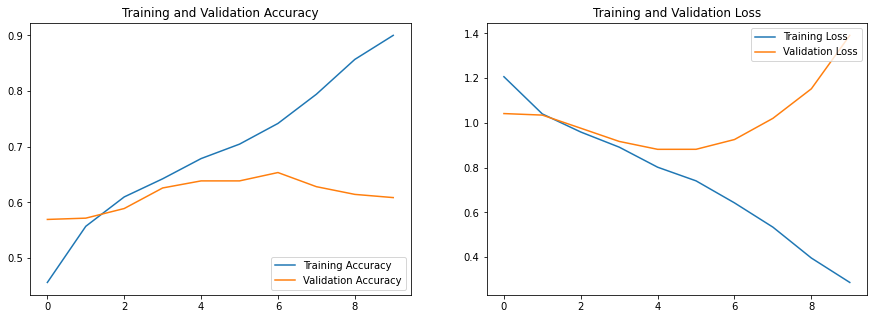

In [7]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 180, 180, 3)
(32,)


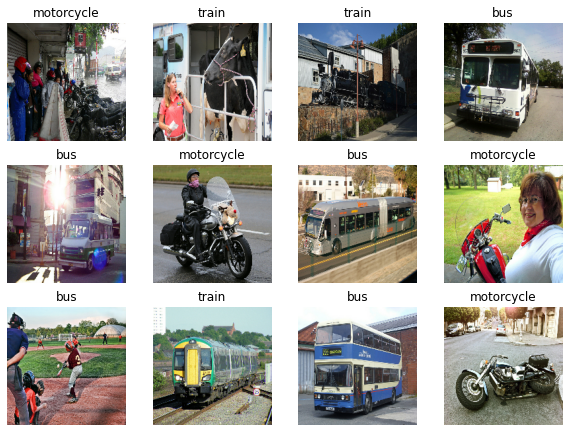

In [8]:
plt.figure(figsize=(10, 10))
for image, _ in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

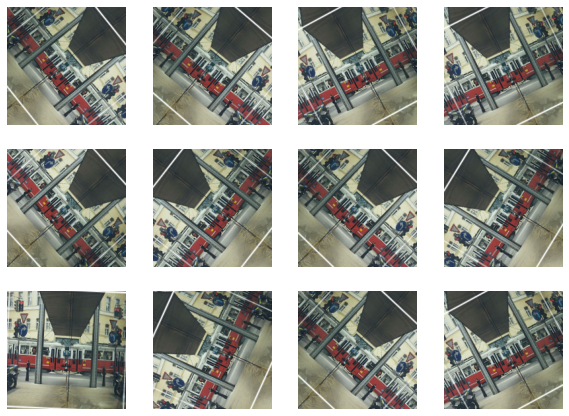

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),])


for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [11]:
batch_size = 32
IMG_SIZE = (180, 180)
IMG_SHAPE = IMG_SIZE + (3, )
base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMG_SHAPE, 
    include_top = False, 
    weights = 'imagenet')

image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9406464/9406464 [==============================] - 0s 0us/step
(32, 6, 6, 1280)


In [12]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [17]:
inputs = tf.keras.Input(shape = (180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

baseline_learning_rate = 0.001
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= baseline_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_dataset)

print('initial loss: {:2f}'.format(loss0))
print('initial accuracy: {:2f}'.format(accuracy0))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 180, 180, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 180, 180, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

In [18]:
history = model.fit(
    train_dataset, 
    epochs = initial_epochs, 
    validation_data = val_dataset)

Epoch 1/10
109/109 [==============================] - 8s 53ms/step - loss: 0.8946 - accuracy: 0.6674 - val_loss: 0.5153 - val_accuracy: 0.8129
Epoch 2/10
109/109 [==============================] - 6s 52ms/step - loss: 0.7262 - accuracy: 0.7280 - val_loss: 0.4808 - val_accuracy: 0.8233
Epoch 3/10
109/109 [==============================] - 6s 52ms/step - loss: 0.6935 - accuracy: 0.7393 - val_loss: 0.5016 - val_accuracy: 0.8141
Epoch 4/10
109/109 [==============================] - 6s 57ms/step - loss: 0.6870 - accuracy: 0.7421 - val_loss: 0.4825 - val_accuracy: 0.8360
Epoch 5/10
109/109 [==============================] - 6s 52ms/step - loss: 0.6431 - accuracy: 0.7597 - val_loss: 0.4688 - val_accuracy: 0.8268
Epoch 6/10
109/109 [==============================] - 6s 53ms/step - loss: 0.6276 - accuracy: 0.7690 - val_loss: 0.4881 - val_accuracy: 0.8187
Epoch 7/10
109/109 [==============================] - 6s 52ms/step - loss: 0.6067 - accuracy: 0.7681 - val_loss: 0.4658 - val_accuracy: 0.8268

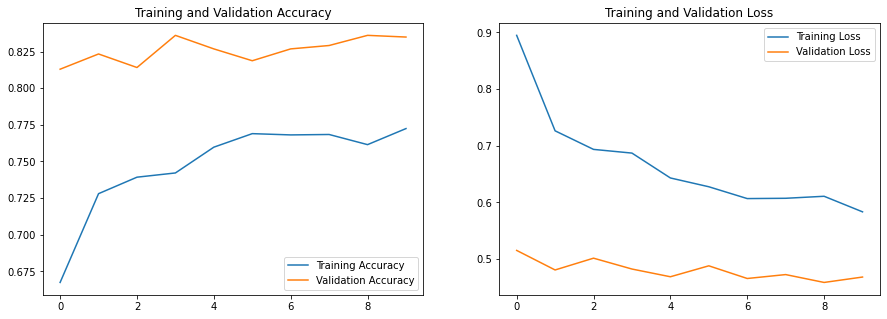

In [19]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
base_model.trainable = True
base_model.summary()

# Let's take a look to see how many layers are are in the base model
print("Number of layer in the model: ", len(base_model.layers))

# Fine tuning from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [21]:
baseline_learning_rate = 0.0001
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = baseline_learning_rate/10),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])


In [23]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_dataset, 
                    epochs = total_epochs, 
                    initial_epoch = history.epoch[-1],
                    validation_data = val_dataset)

Epoch 10/20
109/109 [==============================] - 12s 74ms/step - loss: 0.5765 - accuracy: 0.7788 - val_loss: 0.4389 - val_accuracy: 0.8487
Epoch 11/20
109/109 [==============================] - 7s 65ms/step - loss: 0.5300 - accuracy: 0.7981 - val_loss: 0.4374 - val_accuracy: 0.8418
Epoch 12/20
109/109 [==============================] - 7s 66ms/step - loss: 0.5079 - accuracy: 0.8082 - val_loss: 0.4406 - val_accuracy: 0.8464
Epoch 13/20
109/109 [==============================] - 7s 66ms/step - loss: 0.4838 - accuracy: 0.8076 - val_loss: 0.4388 - val_accuracy: 0.8453
Epoch 14/20
109/109 [==============================] - 7s 67ms/step - loss: 0.4881 - accuracy: 0.8117 - val_loss: 0.4430 - val_accuracy: 0.8349
Epoch 15/20
109/109 [==============================] - 7s 66ms/step - loss: 0.4524 - accuracy: 0.8269 - val_loss: 0.4385 - val_accuracy: 0.8453
Epoch 16/20
109/109 [==============================] - 7s 66ms/step - loss: 0.4655 - accuracy: 0.8197 - val_loss: 0.4452 - val_accuracy

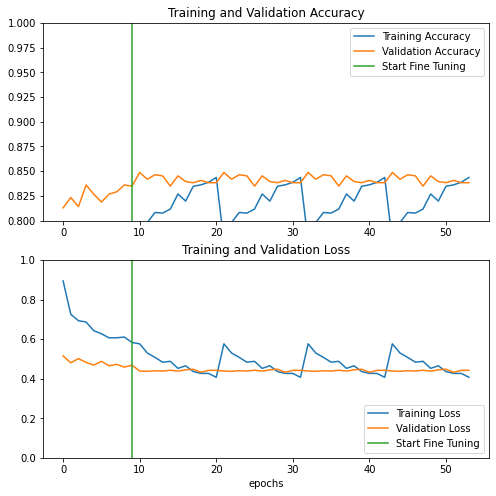

In [27]:
accuracy += history_fine.history['accuracy']
validation_accuracy += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
validation_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label = 'Start Fine Tuning')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

plt.xlabel('epochs')

plt.show()

In [28]:
new_data_dir = "gdrive/My Drive/vehicle_pictures"
batch_size = 32
img_height = 180
img_width = 180

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = test_dataset.class_names
print(class_names)

Found 20 files belonging to 4 classes.
['Bus', 'Motorcycle', 'Plane', 'train']


(20, 180, 180, 3)
(20,)


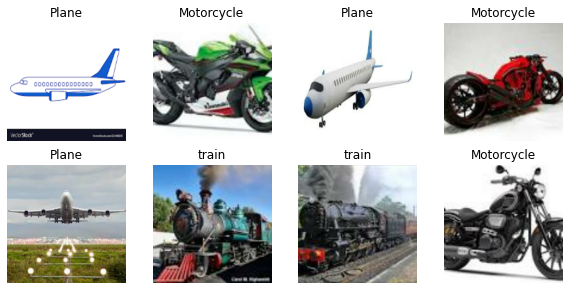

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in test_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [31]:
loss, accuracy = model.evaluate(test_dataset)
print('Test Accuracy: ', accuracy)

1/1 [==============================] - 0s 432ms/step - loss: 0.0457 - accuracy: 1.0000
Test Accuracy:  1.0
